In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [71]:
survivals = pd.read_csv("real_output.csv")

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_data["Cabin"] = train_data["Cabin"].map(lambda x: 0 if (pd.isnull(x)) else 1)
test_data["Cabin"] = test_data["Cabin"].map(lambda x: 0 if (pd.isnull(x)) else 1)

In [37]:
#cabin_dummies_titanic  = pd.get_dummies(train_data['Cabin'], prefix="Cab_")
#cabin_dummies_test  = pd.get_dummies(test_data['Cabin'], prefix="Cab_")
#train_data = train_data.join(cabin_dummies_titanic)
#test_data = test_data.join(cabin_dummies_test)

In [38]:
#TITLE

train_data["Title"] = train_data["Name"].map(lambda x: x.split()[1].strip('.').strip(','))
test_data["Title"] = test_data["Name"].map(lambda x: x.split()[1].strip('.').strip(','))
sns.countplot(y='Title', data=train_data, orient="v")

In [39]:
def rare_title(x):
    if x not in ["Mr", "Mrs", "Miss", "Master"]: return "Rare"
    else: return x
        
train_data["Title"] = train_data["Title"].apply(rare_title)
test_data["Title"] = test_data["Title"].apply(rare_title)

In [40]:
title_dummies_titanic  = pd.get_dummies(train_data['Title'])
title_dummies_test  = pd.get_dummies(test_data['Title'])

train_data.drop("Title", axis=1, inplace=True)
train_data = train_data.join(title_dummies_titanic)

test_data.drop("Title", axis=1, inplace=True)
test_data = test_data.join(title_dummies_test)

In [41]:
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.replace(np.nan, x.median()))

test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.replace(np.nan, x.median()))

In [42]:
#CLASS

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(9,3))
sns.countplot(x='Pclass', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue="Pclass", data=train_data, order=[1,0], ax=axis2)

pclass_perc = train_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=pclass_perc, order=[1,2,3],ax=axis3)

In [43]:
survived_dummies_titanic  = pd.get_dummies(train_data['Pclass'])
survived_dummies_titanic.columns = ['Class_1','Class_2','Class_3']

survived_dummies_test  = pd.get_dummies(test_data['Pclass'])
survived_dummies_test.columns = ['Class_1','Class_2','Class_3']

train_data.drop("Pclass", axis=1, inplace=True)
train_data = train_data.join(survived_dummies_titanic)

test_data.drop("Pclass", axis=1, inplace=True)
test_data = test_data.join(survived_dummies_test)

In [44]:
#SEX

sex_dummies_titanic  = pd.get_dummies(train_data['Sex'])
sex_dummies_titanic.columns = ['Male','Female']

sex_dummies_test  = pd.get_dummies(test_data['Sex'])
sex_dummies_test.columns = ['Male','Female']

train_data.drop("Sex", axis=1, inplace=True)
train_data = train_data.join(sex_dummies_titanic)

test_data.drop("Sex", axis=1, inplace=True)
test_data = test_data.join(sex_dummies_test)

In [45]:
#EMBARKED

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(9,3))
sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_data, order=[1,0], ax=axis2)

pclass_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=pclass_perc, order=['S', 'C', 'Q'],ax=axis3)

In [46]:
#train_data["Embarked"] = train_data["Embarked"].fillna("S")
#
#embarked_dummies_titanic  = pd.get_dummies(train_data['Embarked'])
#embarked_dummies_titanic.columns = ['S','C','Q']
#
#embarked_dummies_test  = pd.get_dummies(test_data['Embarked'])
#embarked_dummies_test.columns = ['S','C','Q']
#
train_data.drop("Embarked", axis=1, inplace=True)
#train_data = train_data.join(embarked_dummies_titanic)
#
test_data.drop("Embarked", axis=1, inplace=True)
#test_data = test_data.join(embarked_dummies_test)

In [47]:
#plt.scatter(train_data['Survived'], train_data['Fare'])
sns.boxplot(x="Fare", y="Survived", data=train_data, orient="h");

test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [48]:
#FAMILY
train_data["Family"] = train_data["SibSp"] + train_data["Parch"]
train_data["Family"]
sns.countplot(x='Family', hue="Survived", data=train_data)

train_data["Single"] = (train_data["Family"] == 0).astype(int)
train_data["SmallFamily"] = ((train_data["Family"] > 0) & (train_data["Family"] < 4)).astype(int)
train_data["BigFamily"] = (train_data["Family"] > 3).astype(int)

In [49]:
test_data["Family"] = test_data["SibSp"] + test_data["Parch"]
test_data["Family"]

test_data["Single"] = (test_data["Family"] == 0).astype(int)
test_data["SmallFamily"] = ((test_data["Family"] > 0) & (test_data["Family"] < 4)).astype(int)
test_data["BigFamily"] = (test_data["Family"] > 3).astype(int)

In [50]:
train_data = train_data.drop(["PassengerId", "Name", "Ticket", "Family", "Parch", "SibSp"], axis=1)
test_data = test_data.drop(["Name", "Ticket", "Family", "Parch", "SibSp"], axis=1)

In [51]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1)

In [52]:
X_train["Age"] = (X_train["Age"] - X_train["Age"].mean())/X_train["Age"].std()
X_train["Fare"] = (X_train["Fare"] - X_train["Fare"].mean())/X_train["Fare"].std()

X_test["Age"] = (X_test["Age"] - X_test["Age"].mean())/X_test["Age"].std()
X_test["Fare"] = (X_test["Fare"] - X_test["Fare"].mean())/X_test["Fare"].std()

In [53]:
X_train.head()

,Age,Fare,Cabin,Master,Miss,Mr,Mrs,Rare,Class_1,Class_2,Class_3,Male,Female,Single,SmallFamily,BigFamily
0,-0.534591,-0.502163,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,0
1,0.668017,0.786404,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0
2,-0.233939,-0.488580,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0,0
3,0.442528,0.420494,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0
4,0.442528,-0.486064,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0


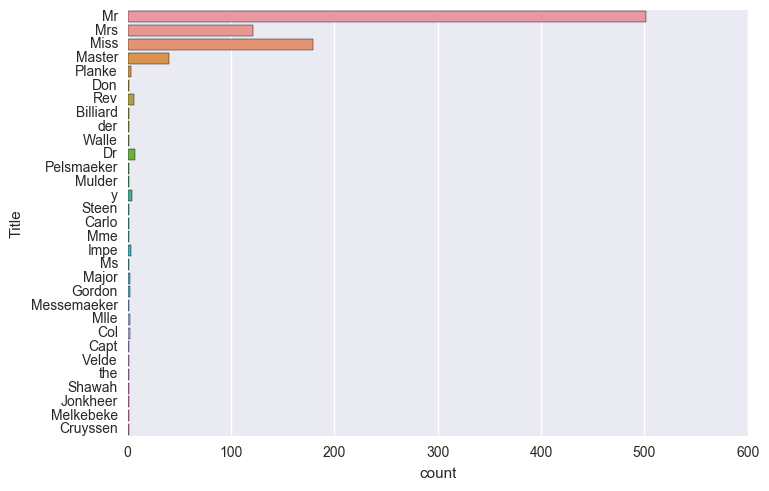

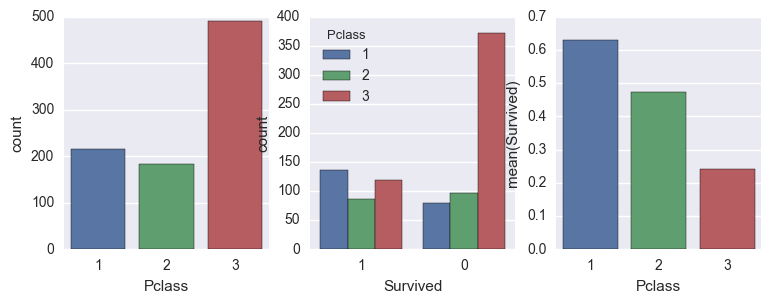

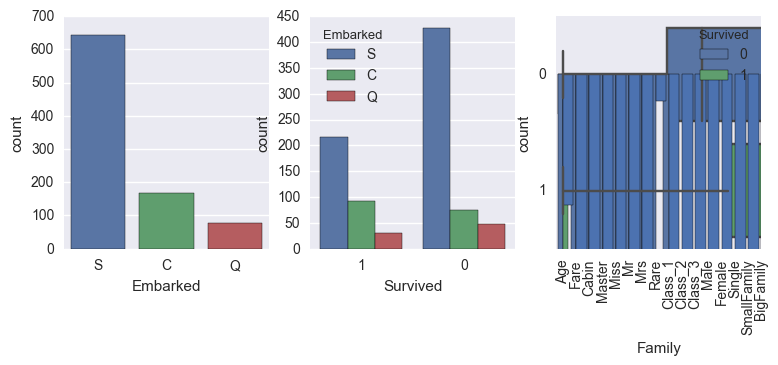

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, Y_train)

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(X_train.columns)), scores)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation='vertical')
plt.show()

In [129]:
import math
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

#estimator = LogisticRegression(C=1.0)
estimator = RandomForestClassifier(n_estimators=140, max_features=2, max_depth=4)

#gscv =  GridSearchCV(estimator, param_grid = params, cv = 10)
estimator.fit(X_train, Y_train)

predictions = estimator.predict(X_test)

accuracy_score(survivals["survived"], predictions)

#estimator = LogisticRegression(C=1.0)
#optimizer = GridSearchCV(estimator, param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30]}, cv = 3)
#estimator.fit(X_train, Y_train)

#Y_pred = estimator.predict(X_test)
#estimator.score(X_train, Y_train)

0.78229665071770338

In [57]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('output.csv', index=False)